In [130]:
#Youtube: https://www.youtube.com/watch?v=vSzou5zRwNQ&ab_channel=ComputerScience

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [132]:
Data = pd.read_csv('fulldata.csv')

In [133]:
Data.head

<bound method NDFrame.head of                     name     energy   diag      pca1      pca2      pca3
0     acetaldehyde_0_015  38.145186  0.378  0.842622 -0.531091  0.067095
1     acetaldehyde_0_015   0.573634  0.005  0.463136  0.636858 -0.534280
2     acetaldehyde_0_015   0.580474  0.005  0.264667  0.540074  0.553770
3     acetaldehyde_0_015  37.980501  0.378  0.029347  0.105040  0.245169
4     acetaldehyde_0_015  75.370940  0.754  0.044385  0.049707  0.439767
...                  ...        ...    ...       ...       ...       ...
1878             toluene   0.581503  0.005 -0.032922  0.033523  0.093225
1879             toluene  38.148987  0.378 -0.031214  0.041654  0.110894
1880             toluene   0.580038  0.005 -0.025586 -0.013104  0.019307
1881             toluene   0.583238  0.005 -0.025052 -0.011829  0.024907
1882             toluene   0.583238  0.005 -0.022429 -0.016721  0.013654

[1883 rows x 6 columns]>

In [134]:
Data.info()
Data.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    1883 non-null   object 
 1   energy  1883 non-null   float64
 2   diag    1883 non-null   float64
 3   pca1    1883 non-null   float64
 4   pca2    1883 non-null   float64
 5   pca3    1883 non-null   float64
dtypes: float64(5), object(1)
memory usage: 88.4+ KB


,count,mean,std,min,25%,50%,75%,max
energy,1883.0,24.416358,27.288977,0.354965,0.409214,0.582452,38.118049,75.461656
diag,1883.0,0.248627,0.277354,0.005000,0.005000,0.005000,0.378000,0.754000
pca1,1883.0,0.184568,0.229187,-0.687571,0.034178,0.068929,0.268753,0.870534
pca2,1883.0,0.109284,0.273241,-0.651034,0.025515,0.071592,0.194131,0.814977
pca3,1883.0,0.088417,0.280693,-0.828189,0.025299,0.097596,0.239532,0.849920


In [135]:
null_counts = Data.isna().sum()
null_counts

name      0
energy    0
diag      0
pca1      0
pca2      0
pca3      0
dtype: int64

<AxesSubplot: >

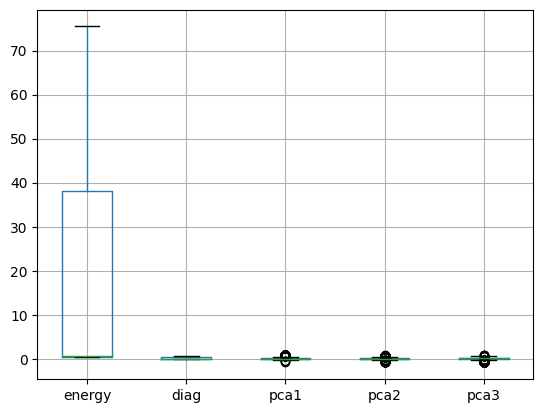

In [136]:
features = ['energy','diag','pca1', 'pca2', 'pca3']
Data.boxplot(features)


<AxesSubplot: >

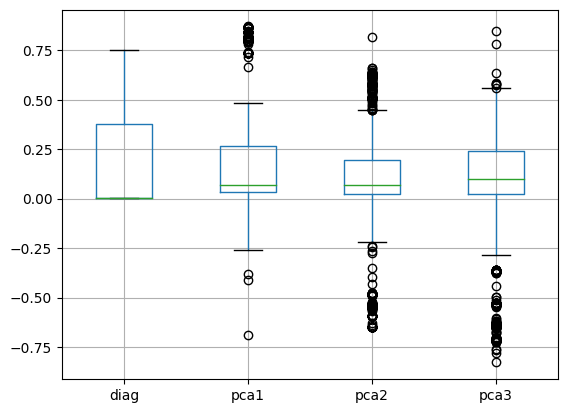

In [137]:
features = ['diag','pca1', 'pca2', 'pca3']
Data.boxplot(features)

In [138]:
selected_features = ['diag','pca1','pca2','pca3']
X = Data[selected_features]

In [139]:
target =  ['energy']
y = Data[target]

In [140]:
# from sklearn.preprocessing import MaxAbsScaler

# max_abs_scaler = MaxAbsScaler()
# X_scale = max_abs_scaler.fit_transform(X)
# X_scale

array([[0.49799733, 0.98208593, 0.08181589, 0.53350766],
       [0.        , 0.73852982, 0.87850091, 0.17514297],
       [0.        , 0.61115137, 0.81248231, 0.82352159],
       ...,
       [0.        , 0.42486546, 0.4351468 , 0.50503036],
       [0.        , 0.42520819, 0.43601651, 0.50836745],
       [0.        , 0.42689164, 0.43267956, 0.50166169]])

In [ ]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

In [141]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.reshaping.flatten import Flatten
from sklearn.model_selection import train_test_split

In [142]:
# import necessary libraries
from sklearn.model_selection import train_test_split


X_train, X_temp, Y_train, Y_temp = train_test_split(X_scale, y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1318, 4) (378, 4) (187, 4) (1318, 1) (378, 1) (187, 1)


In [143]:
#ChatGPT
from sklearn.model_selection import train_test_split

# Split data into training and combined validation/testing sets
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=42)

# Split combined validation/testing set into separate validation and testing sets
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.33, random_state=42)

# Print shapes of all sets
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(1318, 4) (378, 4) (187, 4) (1318, 1) (378, 1) (187, 1)


In [144]:
# X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.2)
# X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
# print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

In [145]:
# model = Sequential()
# model.add(Dense(units = 48, input_dim = 4, activation = 'relu'))
# model.add(Dense(units = 48, activation='relu'))
# model.add(Dense(units = 32, activation='relu'))
# model.add(Dense(units = 32, activation='relu'))
# model.add(Flatten())
# model.add(Dense(units = 1))

In [146]:
model = Sequential()
model.add(Dense(units = 48, input_dim = 4))
model.add(Dense(units = 48, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 32, activation='relu'))
model.add(Dense(units = 16, activation='relu'))
model.add(Flatten())
model.add(Dense(units = 1))

In [147]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [148]:
hist = model.fit(
    X_train, Y_train,
    batch_size=32,
    epochs = 400,
    validation_data=(X_val, Y_val)
)

Epoch 1/400
42/42 [==============================] - 2s 12ms/step - loss: 1256.6545 - mae: 23.8924 - val_loss: 947.4303 - val_mae: 22.6758
Epoch 2/400
42/42 [==============================] - 0s 4ms/step - loss: 558.3256 - mae: 19.5424 - val_loss: 295.5517 - val_mae: 15.1320
Epoch 3/400
42/42 [==============================] - 0s 4ms/step - loss: 110.3656 - mae: 7.8041 - val_loss: 3.4477 - val_mae: 1.5065
Epoch 4/400
42/42 [==============================] - 0s 5ms/step - loss: 2.2027 - mae: 0.9642 - val_loss: 1.4116 - val_mae: 0.7588
Epoch 5/400
42/42 [==============================] - 0s 4ms/step - loss: 1.2375 - mae: 0.7108 - val_loss: 1.1638 - val_mae: 0.6633
Epoch 6/400
42/42 [==============================] - 0s 5ms/step - loss: 1.0855 - mae: 0.6698 - val_loss: 1.1792 - val_mae: 0.7534
Epoch 7/400
42/42 [==============================] - 0s 5ms/step - loss: 1.1155 - mae: 0.6875 - val_loss: 1.0992 - val_mae: 0.6725
Epoch 8/400
42/42 [==============================] - 0s 4ms/step - 

In [149]:
model.evaluate(X_test, Y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.7824 - mae: 0.5067


[0.7824479341506958, 0.5067492723464966]

In [150]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, Y_test)
print(f"Test loss: {test_loss:.3f}, Test MAE: {test_mae:.3f}")

6/6 [==============================] - 0s 3ms/step - loss: 0.7824 - mae: 0.5067
Test loss: 0.782, Test MAE: 0.507


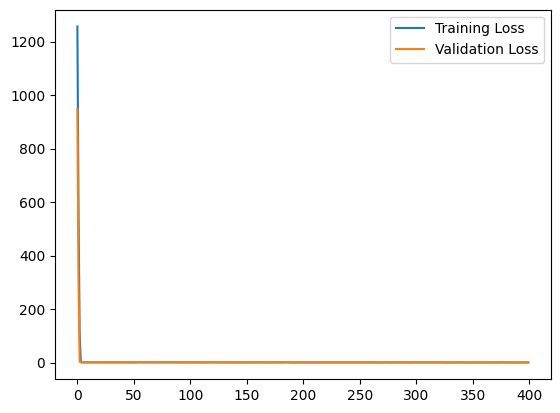

In [151]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [152]:
train_accuracy = 1 - hist.history['mae'][-1]
print(f"Training accuracy: {train_accuracy}")

Training accuracy: 0.5324456989765167


In [153]:
print("Generate a prediction")
prediction = model.predict(X_test)
print("Prediction: ", prediction[:10])

Generate a prediction
6/6 [==============================] - 0s 2ms/step
Prediction:  [[37.880272  ]
 [ 0.4541909 ]
 [73.602936  ]
 [ 0.46498567]
 [36.11752   ]
 [ 0.47330797]
 [35.75852   ]
 [ 0.57411873]
 [37.66949   ]
 [ 0.44981754]]


In [154]:
np.array(Y_test[:10])

array([[37.8783219],
       [ 0.4070453],
       [75.4566867],
       [ 0.4084044],
       [35.5847451],
       [ 0.4059722],
       [35.5261352],
       [ 0.5716702],
       [38.1130453],
       [ 0.5739932]])